# TP 2 : Etude des filtres actifs et passifs

L'objectif de ce TP est l'étude des filtres passifs et actifs, nous verrons la façon de les caractériser puis nous examinerons les montages électroniques permettant de les réaliser. 

## Caractéristiques d'un filtre passe-bas

La courbe de gain et la courbe de phase d'un filtre passe-bas sont données sur la figure suivante. On y distingue les éléments suivants :
- La bande passante, pour laquelle le signal d'entrée doit être préservé (gain = 1)
- La pulsation de coupure, pour laquelle le gain vaut $\frac{1}{\sqrt{2}}$
- La bande d'arrêt, pour laquelle le signal d'entrée doit être atténué (gain très inférieur à 1)
- la pente ou l'atténuation dans la bande d'arrêt directement liée à l'ordre du filtre ($-20 \times n $ dB)
- Le déphasge dans la bande passante, qui fournit une indication sur le temps de retard de groupe entre l'entrée et la sortie.

<img src="./images/Lab2/1.png" />

La figure suivante montre le diagramme de Bode d'un filtre du 1er ordre avec une atténuation de 20 dB par décade. 

<img src="./images/Lab2/3.png" />

# Filtres passifs

La forme la plus simple d'un filtre passe-bas est une cellule RC, comme sur le schéma ci-dessous en se restraignant à (R1,C1). En prenant la sortie aux bornes de C1, la fonction de transferte est alors (on applique le diviseur de tension :

$
V_{C1}(p)=\frac{\frac{1}{C_1p}}{R_1 + \frac{1}{C_1p}}
$

qui s'écrit aussi 

$
V_{C1}(p)=\frac{1}{1 + R_1 C_1 p}
$

On notera qu'en notation complexe, on obtient :

$
V_{C1}(j \omega)=\frac{1}{1 + j R_1 C_1 \omega}
$

Ce qui donne bien un  gain de $1$ en basses fréquences $\omega = 0$ et une équivalence en $\frac{1}{j R_1 C_1 \omega}$ quand $\omega \to \infty$ et qui tend donc vers 0. 


<img src="./images/Lab2/4.png" />

On obtient des filtres d'ordre supérieurs en mettant en cascade des cellules $R_i C_i$ comme sur la figure ci-dessus. Nous avons à titre d'exemple pour la mise en cascade de deux cellules, un filtre du second ordre de fonction de transfert (à calculer en utilisant le théorème de Millman)


Théorème de Millman au point 1 : 

$
V_1(p)=\frac{\frac{V_{in}}{R_1} + \frac{V_{out}}{R_2}}{\frac{1}{R_1} + \frac{1}{R_2} + C_1 p}
$

ou encore 

$
V_1(p)=\frac{{V_{in}}{R_2} + {V_{out}}{R_1}}{{R_1} + {R_2} + R_1 R_2 C_1 p}
$

L'application du diviseur de tension donne par la suite 

$
V_{out}(p)=\frac{1}{1 + R_2 C_2 p} V_1
$


En remplaçant $V_1(p)$ par sa valeur, on obtient : 

$
(1 + R_2 C_2 p)({{R_1} + {R_2} + R_1 R_2 C_1 p})V_{out}(p) = {V_{in}}{R_2} + {V_{out}}{R_1}
$

Tous calculs faits, on obtient finalement la fonction de transfert $H_2(p)$

$
H(p)=\frac{V_{out}(p)}{V_{in}(p)}=\frac{1}{ 1 + (R_{2} C_2 +R_1(C_1+C_2))p + R_1 R_{2}C_1C_2 p^2}
$

Posons  

$
\omega_0^2=\frac{1}{ R_1 R_{2}C_1C_2}
$


### Cas 1 $R_1=R_2=R$ et $C_1=C_2=C$ 

Dans le cas de résistances et condensateurs de valeurs égales $(R_i = R)$ et $(C_i = C)$, on aura 

$
\omega_0=\frac{1}{ RC}
$

et la fonction de transfert se met sous la forme simplifiée 
$
H(p)=\frac{1}{ 1 + 3 \frac{p}{\omega_0} +\frac{p^2}{\omega_0^2}}
$

Il faut noter que le dénominateur de ce filtre peut se mettre sous la forme 

$
H(p)=\frac{1}{ (1+\tau_1 p)(1 + \tau_2 p)} 
$

C'est donc deux premiers ordre en cascade. Il n'y a pas d'amortissement. Il faudrait pour cela utiliser une cellule $(R, L, C)$.

Le calcul des deux fréquences de coupure donnent 

$
\omega_1 = \frac{1}{\tau_1}=\frac{3+\sqrt{5}}{2}\omega_0
$

$
\omega_2 = \frac{1}{\tau_2}=\frac{3-\sqrt{5}}{2}\omega_0
$

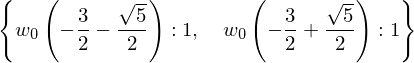

In [1]:
import sympy
sympy.init_printing()
p = sympy.Symbol('p')

w0 = sympy.Symbol('w0')
Den = 1+3*p/w0+p**2/w0**2
w = sympy.roots(Den,p)
w

En application numérique, pour $R=100 k\Omega$ et $C = 1 \mu F$, nous avons $\omega_0 = 100 rad/s$

In [2]:
w0=10.0
Den = 1+3*p/w0+p**2/w0**2
w = sympy.roots(Den,p)
w

Ce qui nous permet de conclure que les deux pulsations sont $\omega_1=261.8 rad/s$ et $\omega_2=38.2 rad/s$ au lieu de 100 rad/s

### Cas 2 ($R_1= 10k\Omega, C_1 = 1\mu F$) et ($R_2= 1k\Omega, C_2 = 1\mu F$)

In [35]:
R1=10000.0
R2=1000.0
C1=1e-6
C2=1e-6
Den= 1 + (R2*C2 +R1*(C1+C2))*p + R1*R2*C1*C2*p**2
w = sympy.roots(Den,p)
w


Cette fois-ci les pulsations initialement de $100 rad/s$ et $1000 rad/s$ sont transformées en $2051.25 rad/s$ et $48.75 rad/s$. 

1. Donner la structure et la fonction de transfert d'un passe-haut d'ordre 2.
2. Donner la structure et la fonction de transfert d'un passe-bande d'ordre 2. 
3. Donner la structure et la fonction de transfert d'un passe-bas d'ordre 3.

## Effet de la variation de la charge
Les calculs précédents ont été faits en considérant une charge infini. Que se passe-t-il si on ajoute une résistance $Rc=1k\Omega$ en parallèle du condensateur du second étage.

## Filtre passe-bande
Un filtre passe-bande ne laisse passer que les fréquences dans une bande bien spécifique située dans l'intervalle $\left[ \omega_1 \omega_2 \right]$. Il est en quelque sorte une combinaison d'un passe-bas (R-C) et d'un passe-haut (R-L) mis en cascade. Une application importante des filtres passe-bande concerne l'audio et les systèmes de télécom, quand on veut laisser passer un bande de fréquences (par exemple une station radio) et filtrer les parasites et les autres signaux (par exemple le signal émis par une autre station). 

## Etude en simulation

Ouvir l'outil MULTISIM puis le fichier passe-bas. Une autre alternative est de créer un compte sur le site du fournisseur Digikey et de lancer l'outil de simulation en ligne 

- https://www.partsim.com/

Les différentes fenêtres d'interface apparaissent ci-dessus

- Espace utilisateur
<img src="./images/Lab2/partsim3.png" />

- Schematics pour la saisie du montage
<img src="./images/Lab2/partsim1.png" />

- Résultats de simulation en AC-SWEEP, tracé du diagramme de Bode
<img src="./images/Lab2/partsim2.png" />


1. Tracer la fonction de tranfert du filtre passe-bas d'ordre 2.
2. Vérifier la valeur des deux pulsations de coupure. 
3. Etudier la sensibilité de la pulsation aux variations des résistances.




# Filtres actifs 

Les filtres passifs rendent d'énormes services et sont encore beaucoup utilisées dans de nombreux domaines à des coûts réduits. Il présentent des inconvénients comme nous l'avons vu plus haut, la changement de la valeur de la charge affecte par exemple la fréquence de coupure. Les fitres actifs lévent cette difficulté. Ils comportent un composant actif principalement à base d'amplificateur opérationnel ou de tanssistor. De plus, le filtre actif apporte la facilité d'isoler les étages mis en cascade entre eux (impédance de sortie faible du montage amont et impédance d'entrée élevée du montage aval). Il offrent aussi la possibilité d'ajouter un gain au montage. 

Les filtres actifs sont souvent présentés sous formce de cellule du second ordre (Sallen Kay par exemple) qui sont alors mise en cascade comme lorsqu'on factorise une fonction de transfert après calcul des pôles. 

On peut les utiliser pour réaliser tous types de filtres avec les différentes approximations : Butterworth, Chebychev, Cauer,...

La figure ci-dessous présente un

<img src="./images/Lab2/5.png" />

<img src="./images/Lab2/8.png" />

## Etude pratique

<img src="./images/Lab2/6.png" />

<img src="./images/Lab2/7.png" />